<a href="https://colab.research.google.com/github/gioguarnieri/Materias_Doutorado_INPE/blob/main/Estat%C3%ADstica_Computacional/CAP417HandsOn1_Giovanni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 417 - PARTE C - HANDS-ON 01
Aluno: Giovanni Guarnieri Soares


##Bibliotecas e Comandos Necessários:

In [28]:
# capture is a magic command to capture the output
%%capture
!pip install -U kaleido # needed to the images
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca # needed to save the images
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import plotly.io as pio
import plotly.express as px # plotting module
import plotly.graph_objects as go # plotting module

pio.renderers.default = "png" # setting png as default so images appear in github

## Importação das Séries Temporais para este notebook:

In [29]:
#Importar um arquivo do seu desktop para o Colab

#File from your computer:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#File from GoogleDrive:
#from google.colab import drive
#drive.mount('/content/drive')

Saving exo.csv to exo (2).csv
Saving endo.csv to endo (2).csv
User uploaded file "exo.csv" with length 31773 bytes
User uploaded file "endo.csv" with length 30693 bytes


## Manipulação de Dataframe

In [30]:
dfendo = pd.read_csv(io.BytesIO(uploaded['endo.csv']), header = None)
dfexo = pd.read_csv(io.BytesIO(uploaded['exo.csv']), header = None)

dfs = pd.concat([dfexo, dfendo], axis=1, join='inner')
dfs.columns = ["exo", "endo"]
dfs.insert(0, "endo_normed", (dfs["endo"] - np.mean(dfs["endo"]))/np.std(dfs["endo"]))
dfs.insert(0, "exo_normed", (dfs["exo"] - np.mean(dfs["exo"]))/np.std(dfs["exo"]))

dfs


,exo_normed,endo_normed,exo,endo
0,0.583128,0.032145,2.78590,1.02060
1,0.395511,-0.763211,2.21130,0.53477
2,0.508584,-0.765634,2.55760,0.53329
3,-0.055765,-0.185934,0.82921,0.88739
4,0.673148,0.977249,3.06160,1.59790
...,...,...,...,...
4091,-0.384350,0.361204,-0.17712,1.22160
4092,-0.132490,-0.360237,0.59423,0.78092
4093,-0.059171,-0.285830,0.81878,0.82637
4094,0.216677,-0.319080,1.66360,0.80606


# Exercício:

## STEP 1: Plotando a ST (com Opção de Média Zero)



In [31]:
#Opções de Normalização
#dx = (dx-min(dx))/(max(dx)-min(dx))
#Obs: Não é necessário neste hands-on

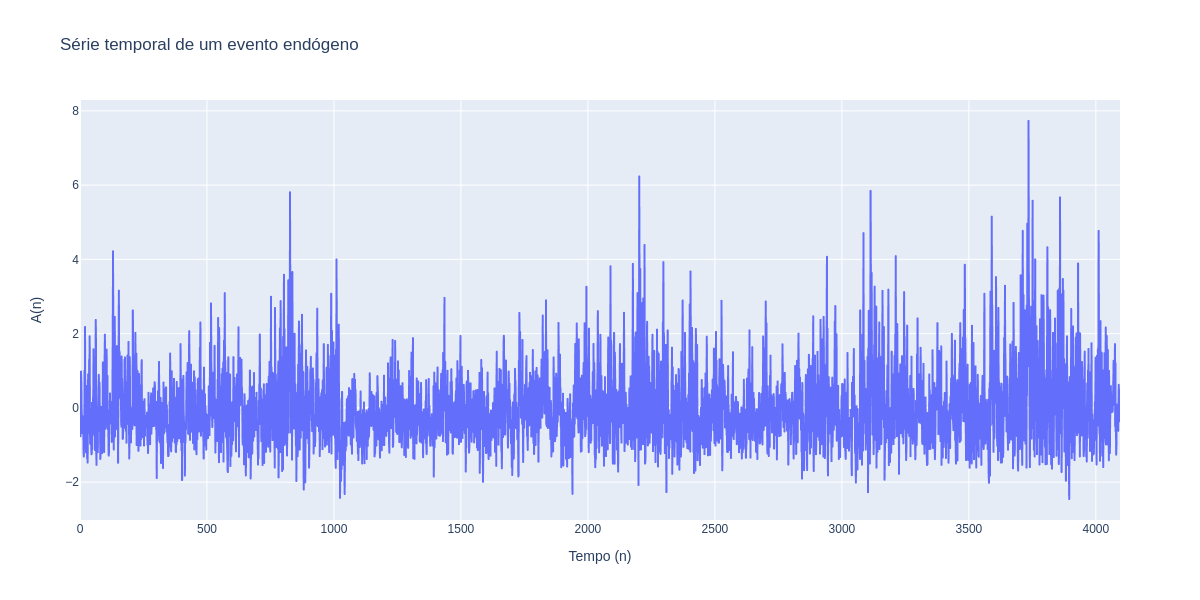

In [32]:
fig = px.line(dfs,  
              y="endo_normed",
              title = "Série temporal de um evento endógeno",
              width=1200, height=600,
              labels={'index':'Tempo (n)', 'endo_normed':'A(n)'})
fig.show()

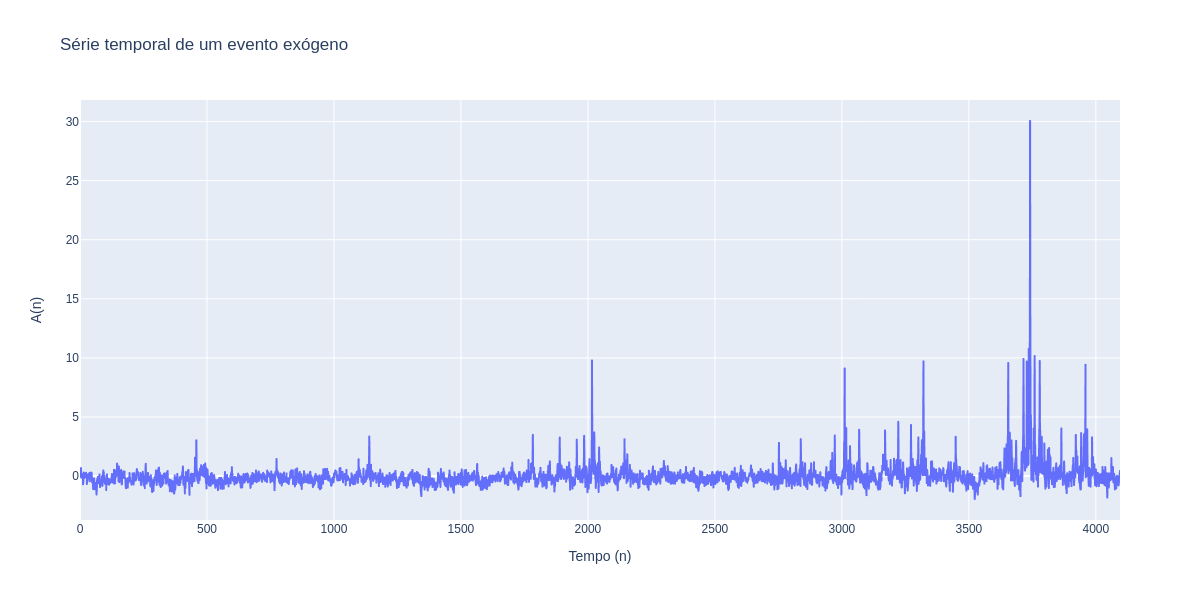

In [33]:
fig = px.line(dfs,  
              y="exo_normed",
              title = "Série temporal de um evento exógeno",
              width=1200, height=600,
              labels={'index':'Tempo (n)', 'exo_normed':'A(n)'})
fig.show()

## STEP 2: OBTER 3SIGMA E REMOVER VALORES ACIMA DE 3SIGMA  

(VOCÊ DEVE IMPLEMENTAR ESSE MÓDULO)

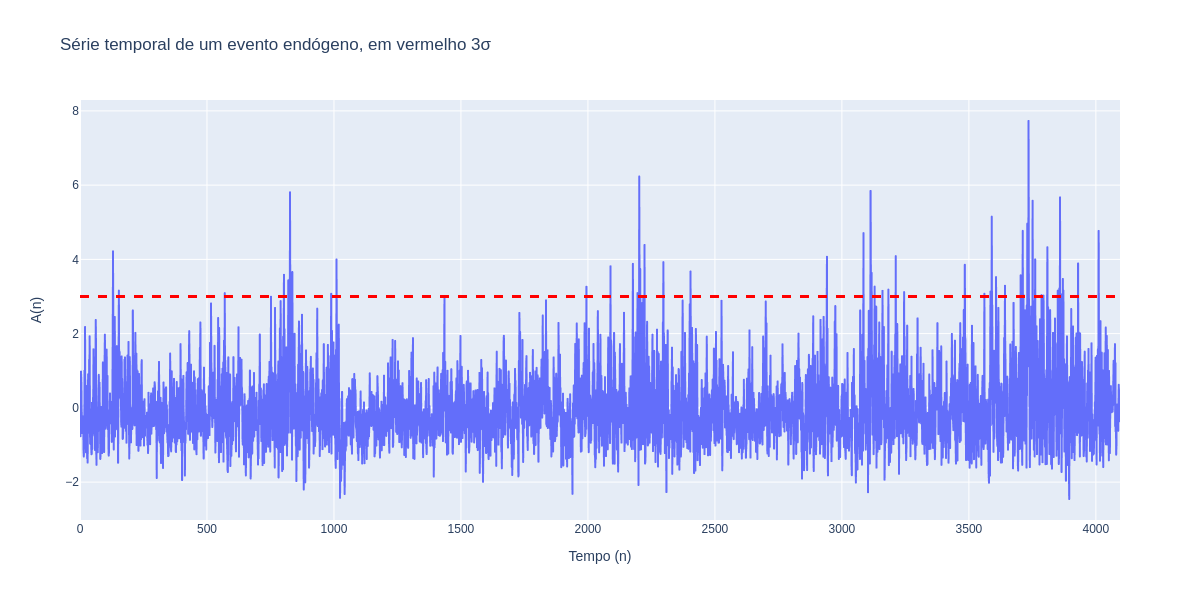

In [34]:
fig = px.line(dfs,  
              y="endo_normed",
              title = "Série temporal de um evento endógeno, em vermelho 3σ",
              width=1200, height=600,

              labels={'index':'Tempo (n)', 'endo_normed':'A(n)'})
fig.add_hline(y=3*np.std(dfs["endo_normed"]), line_width=3, line_dash="dash", line_color="red", name = "3σ")

fig.show()

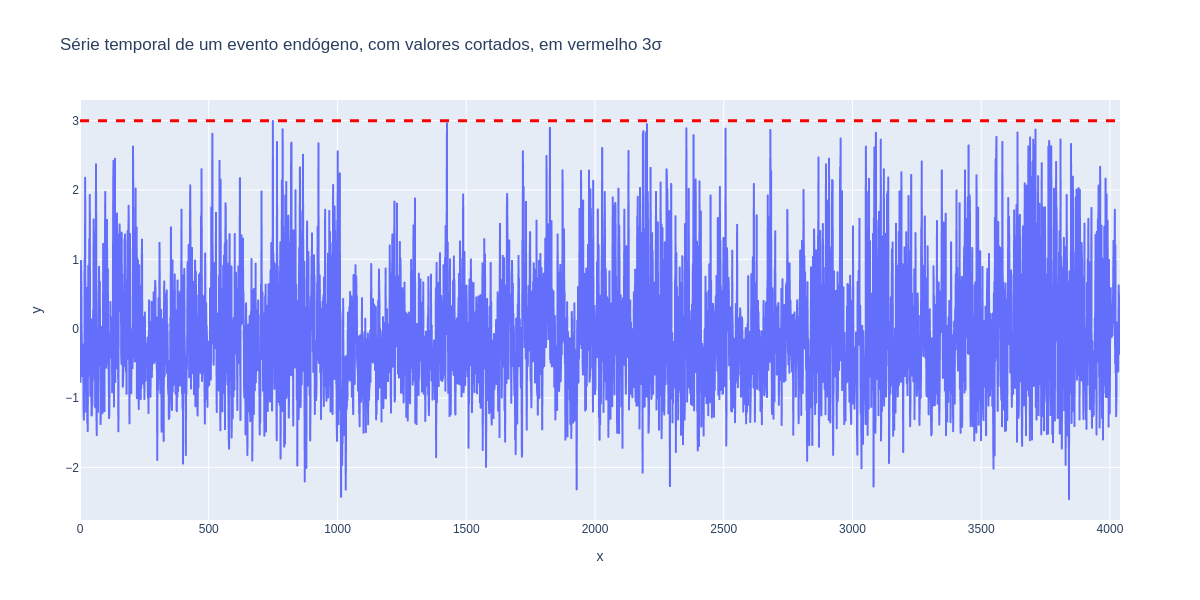

In [35]:
x = dfs[ dfs["endo_normed"] < 3*np.std(dfs["endo_normed"]) ]["endo_normed"]
dfs.insert(0,"endo_cut",x)

fig = px.line(x = range(len(x)),  
              y=x,
              title = "Série temporal de um evento endógeno, com valores cortados, em vermelho 3σ",
              width=1200, height=600,

              labels={'index':'Tempo (n)', 'endo_normed':'A(n)'})
fig.add_hline(y=3*np.std(dfs["endo_normed"]), line_width=3, line_dash="dash", line_color="red", name = "3σ")
fig.show()



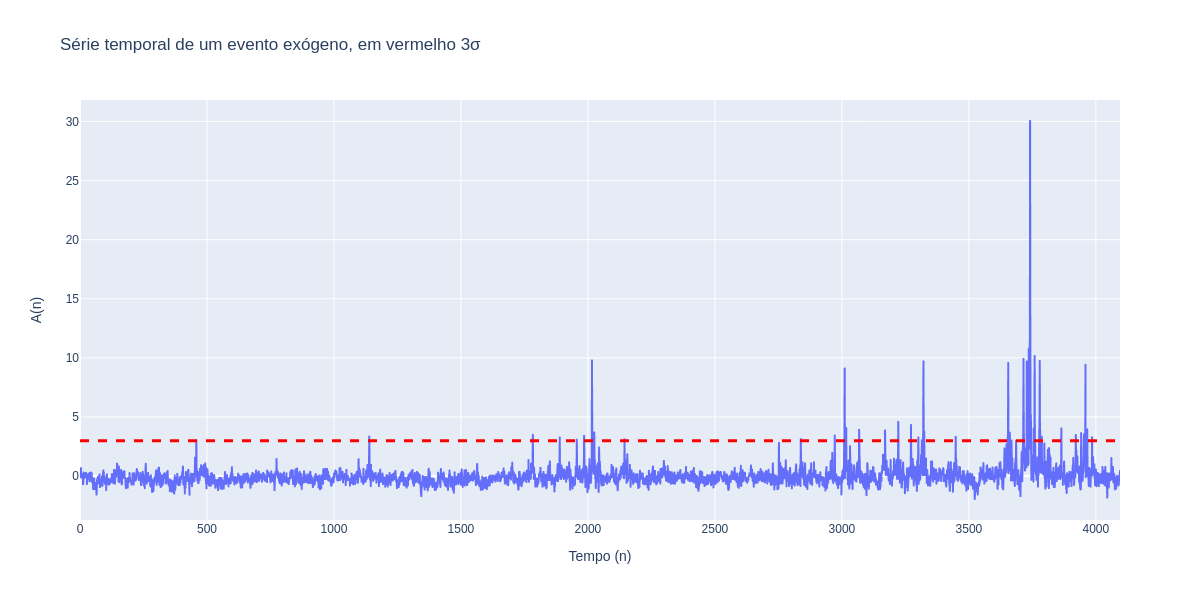

In [36]:
fig = px.line(dfs,  
              y="exo_normed",
              title = "Série temporal de um evento exógeno, em vermelho 3σ",
              width=1200, height=600,

              labels={'index':'Tempo (n)', 'exo_normed':'A(n)'})
fig.add_hline(y=3*np.std(dfs["exo_normed"]), line_width=3, line_dash="dash", line_color="red", name = "3σ")

fig.show()

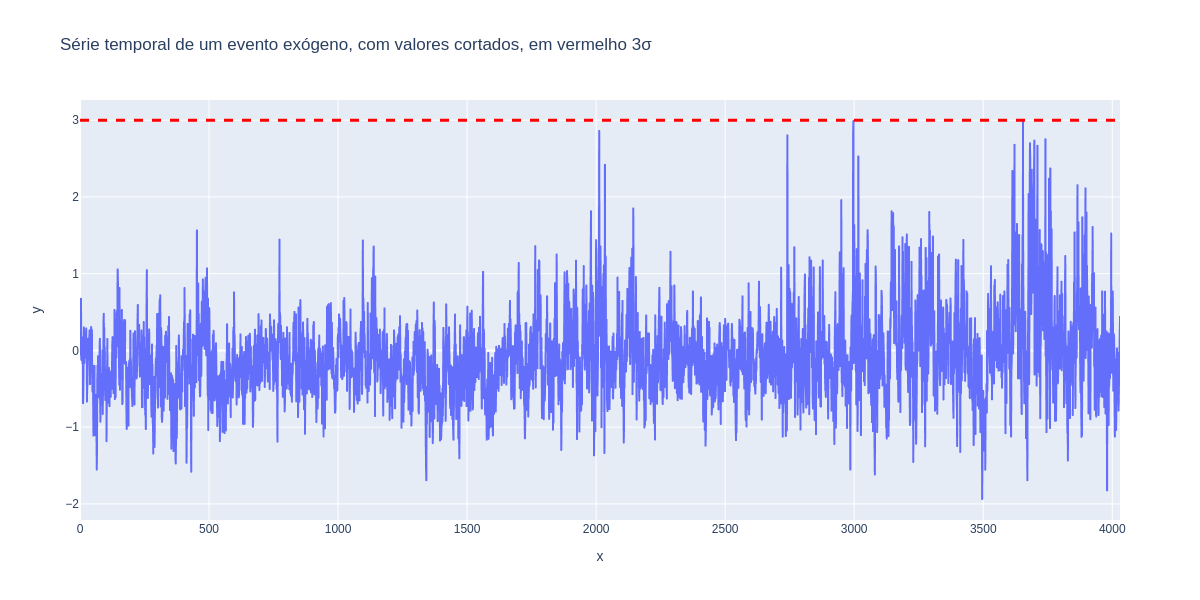

In [37]:
x = dfs[ dfs["exo_normed"] < 3*np.std(dfs["exo_normed"]) ]["exo_normed"]
dfs.insert(0,"exo_cut",x)
fig = px.line(x = range(len(x)),  
              y=x,
              title = "Série temporal de um evento exógeno, com valores cortados, em vermelho 3σ",
              width=1200, height=600,

              labels={'index':'Tempo (n)', 'exo_normed':'A(n)'})
fig.add_hline(y=3*np.std(dfs["exo_normed"]), line_width=3, line_dash="dash", line_color="red", name = "3σ")

fig.show()

Veja exemplo na transparencia enviada ao final da aula 2. Nesse caso, teremos uma 2a ST a partir da 1a ST. A original e a outra sem as flutuações extremas.
Denomine essa 2a ST como dfendo2 ou dfexo2. Plote os histogramas para cada uma r calcule os momentos estatísticos K e S, seguindo os passos abaixo.  Note que teremos ao final 4 series temporais: dfendo e dfendo2, dexo e dexo2. 

## STEP 3: HISTOGRAMA COM AJUSTE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



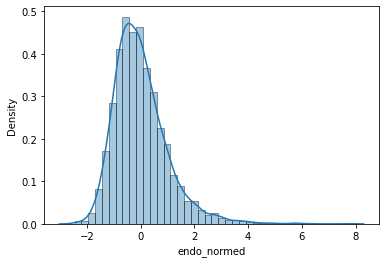

In [38]:
# seaborn histogram with Kernel Density Estimation
sns.distplot(dfs["endo_normed"], bins=40, hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



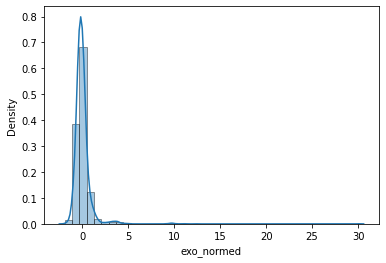

In [39]:
# seaborn histogram with Kernel Density Estimation
sns.distplot(dfs["exo_normed"], bins=40, hist_kws={'edgecolor':'black'})

## STEP 4: CÁLCULO DOS MOMENTOS ESTATÍSTICOS E PLOTAGEM DOS PARAMETROS DE CULLEN-FREY (K E Sˆ2)

In [40]:
print(f"""
Means: {dfs.mean()}

Skewness: {dfs.skew()}

Fisher Kurtosis: {dfs.kurtosis()}
""")

dfs_moments = pd.DataFrame({"mean":dfs.mean(), "SkewnessSq":dfs.skew()**2, "Fisher Kurtosis":dfs.kurtosis()})


Means: exo_cut       -8.542343e-02
endo_cut      -5.450520e-02
exo_normed    -2.414654e-16
endo_normed    1.306924e-15
exo            9.999986e-01
endo           1.000964e+00
dtype: float64

Skewness: exo_cut         0.996859
endo_cut        0.664306
exo_normed     10.487356
endo_normed     1.329442
exo            10.487356
endo            1.329442
dtype: float64

Fisher Kurtosis: exo_cut          3.163324
endo_cut         0.467917
exo_normed     231.349982
endo_normed      3.858083
exo            231.349982
endo             3.858083
dtype: float64



## STEP 5: CONSTRUA E PLOTE O ESPAÇO DE PARÂMETROS (KURTOSIS X QUADRADO DO  SKEWNESS) COM OS RESPECTIVOS VALORES PARA ENDO.CSV (2 ST) E EXO.CSV (2 ST) (USE CORES DIFRENTES)

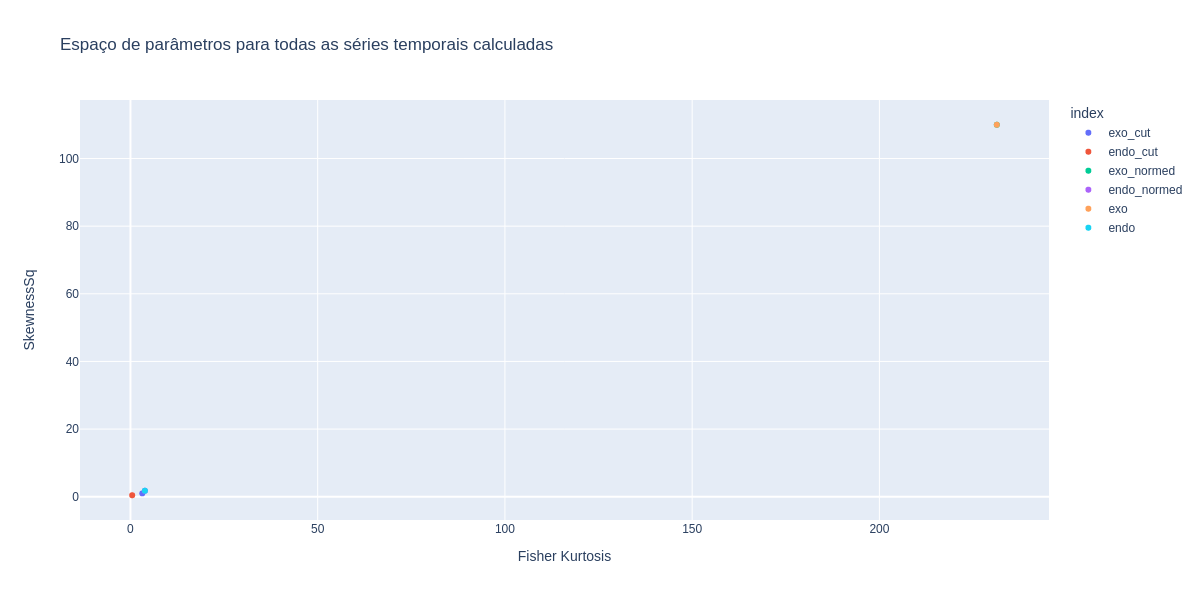

In [41]:
fig = px.scatter(dfs_moments, x = "Fisher Kurtosis",
                 y = "SkewnessSq",
                 color = dfs_moments.index,
                 title = "Espaço de parâmetros para todas as séries temporais calculadas",
                 width=1200, height=600,
                 )
fig.show()
